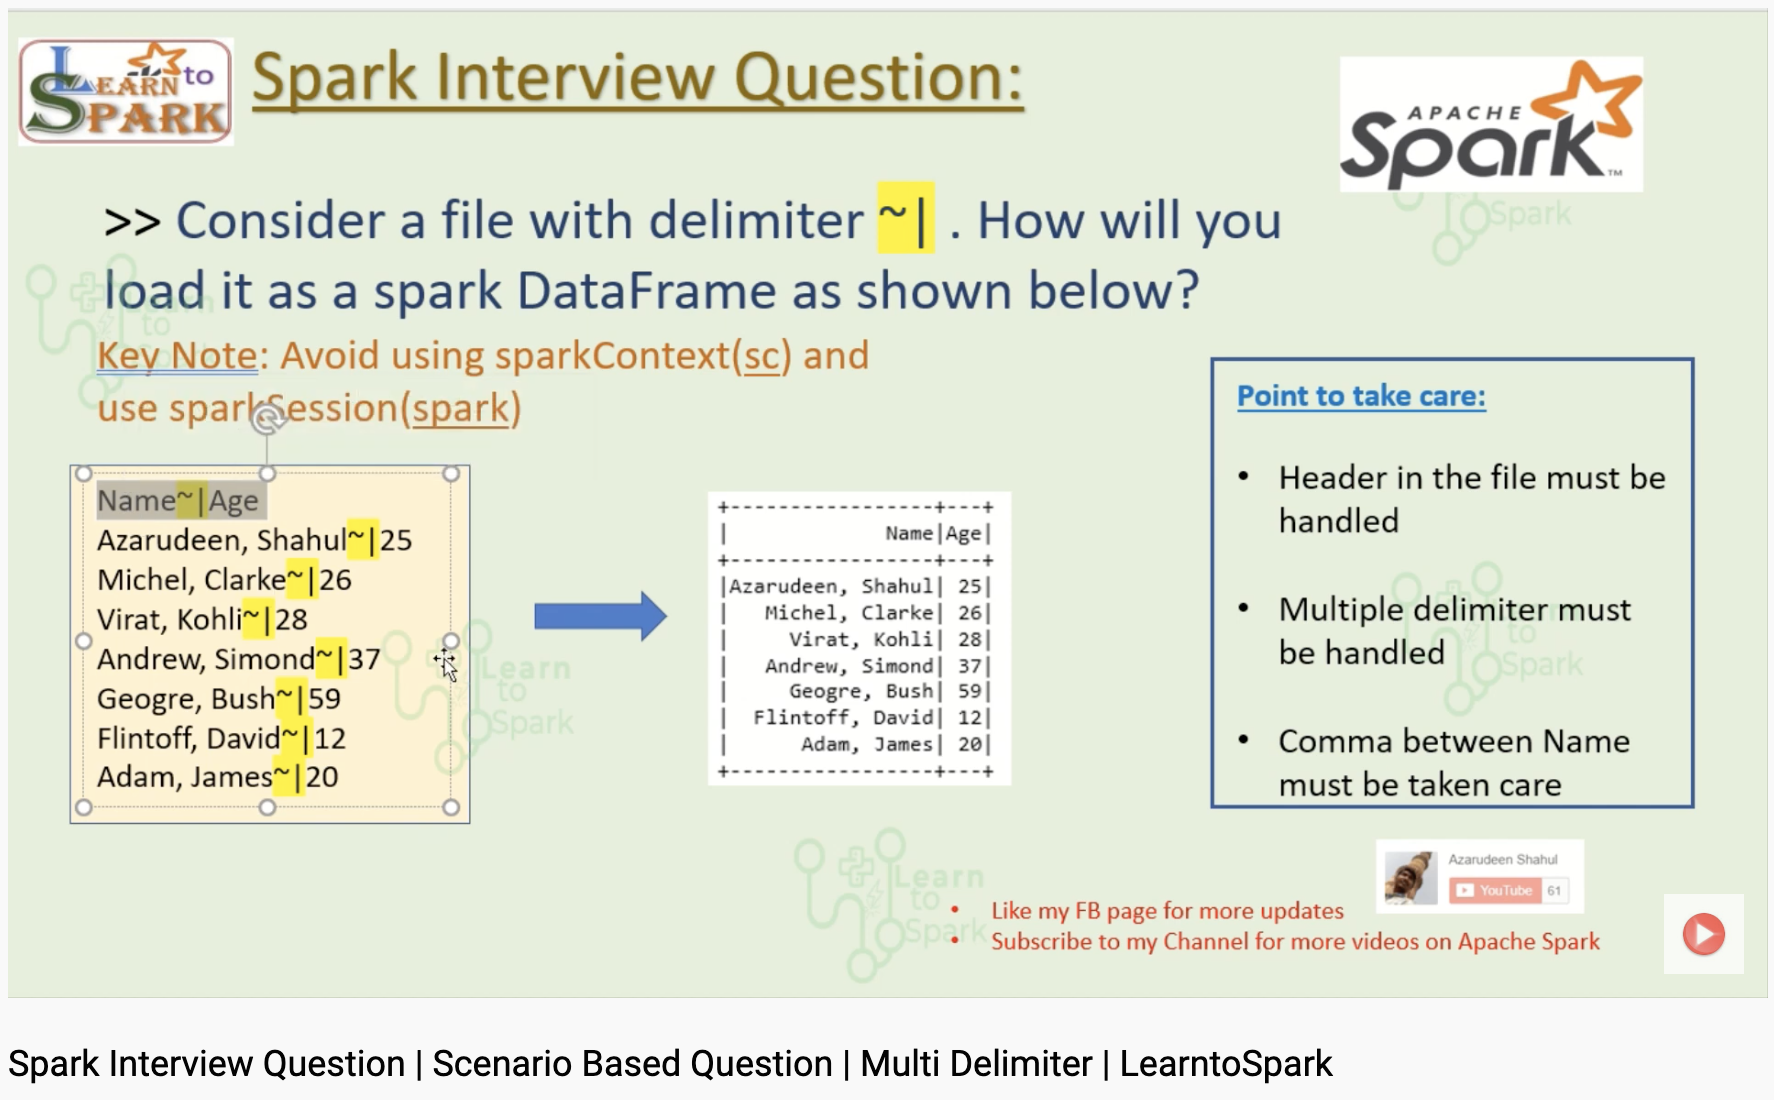

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("multi-Delimiter").getOrCreate()

In [2]:
df = spark.read.csv("multi_delimiter_sample.csv")

In [3]:
df.printSchema()

root
 |-- _c0: string (nullable = true)



In [4]:
df.show()

+---------+
|      _c0|
+---------+
|Name~|Age|
|     Abhi|
|   Sharad|
|    Arnab|
|    Nazim|
+---------+



in this case only 1st part before "," is taken, rest ignored. so we will not able to read to through read.csv

In [5]:
df1= spark.read.option("delimiter","~|").csv("multi_delimiter_sample.csv")
#using multi-delimeter, earlier it was not there

In [6]:
df1.show()

+--------------+---+
|           _c0|_c1|
+--------------+---+
|          Name|Age|
|  Abhi, Mahata| 32|
|Sharad, Tiwari| 35|
|   Arnab, Saha| 33|
|  Nazim,Shaikh| 40|
+--------------+---+



In [68]:
column_name = df1.first()

# reading the entire file as text file

In [18]:
df_t = spark.read.text("multi_delimiter_sample.csv")

In [19]:
df_t.show(truncate=0)
#same as truncate=false

+------------------+
|value             |
+------------------+
|Name~|Age         |
|Abhi, Mahata~|32  |
|Sharad, Tiwari~|35|
|Arnab, Saha~|33   |
|Nazim,Shaikh~|40  |
+------------------+



In [20]:
header = df_t.first()[0]

#why [0]?
#to convert it to string, otherwise it would be row type

In [21]:
type(header)

str

In [38]:
header

'Name~|Age'

In [43]:
schema = header.split("~|")
#spliting the string using delimiter "`|"

In [44]:
schema

['Name', 'Age']

In [45]:
type(schema)

list

In [46]:
df_t.show()

+------------------+
|             value|
+------------------+
|         Name~|Age|
|  Abhi, Mahata~|32|
|Sharad, Tiwari~|35|
|   Arnab, Saha~|33|
|  Nazim,Shaikh~|40|
+------------------+



In [50]:
df_t.filter(df_t['value'] != header).show()
#now we can see 1st row has been removed

+------------------+
|             value|
+------------------+
|  Abhi, Mahata~|32|
|Sharad, Tiwari~|35|
|   Arnab, Saha~|33|
|  Nazim,Shaikh~|40|
+------------------+



In [71]:
df_clean = df_t.filter(df_t['value'] != header).rdd.map(lambda x: x[0].split('~|')).toDF(schema)

In [72]:
df_clean.show(truncate = 0)

+--------------+---+
|Name          |Age|
+--------------+---+
|Abhi, Mahata  |32 |
|Sharad, Tiwari|35 |
|Arnab, Saha   |33 |
|Nazim,Shaikh  |40 |
+--------------+---+



In [75]:
df_clean.write.csv("clean_multi_delimiter_sample.csv",header= True)
#wrtite pyspark df to local csv